### Load Modules

In [ ]:
import os

# Define the folder name you want to create
folder_name = 'my_new_folder'

# Check if the folder already exists
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

Folder 'my_new_folder' created successfully.


In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog

# Define the dataset directory
dataset_dir = '/content/my_new_folder'

def load_and_preprocess_data():
    X = []  # List to store images
    y = []  # List to store labels (0 for "no" and 1 for "yes")

    for label in ['no', 'yes']:
        label_dir = os.path.join(dataset_dir, label)
        for filename in os.listdir(label_dir):
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img = cv2.resize(img, (64, 64))  # Resize the image
            X.append(img)
            y.append(1 if label == 'yes' else 0)

    return np.array(X), np.array(y)

# Load and preprocess the data
X, y = load_and_preprocess_data()

# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features.append(features)
    return np.array(hog_features)

X_hog = extract_hog_features(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn import svm

# Initialize an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the SVM classifier
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 86.27%
Confusion Matrix:
[[15  5]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.85      0.94      0.89        31

    accuracy                           0.86        51
   macro avg       0.87      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 86.27%
Confusion Matrix:
[[15  5]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.85      0.94      0.89        31

    accuracy                           0.86        51
   macro avg       0.87      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51



In [ ]:
import cv2
import numpy as np
from skimage.feature import hog

# Load and preprocess a test image
def load_and_preprocess_test_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, (64, 64))  # Resize the image
    return img

# Load and preprocess the test image
test_image = load_and_preprocess_test_image('/content/my_new_folder/yes/Y11.jpg')

# Extract HOG features from the test image
def extract_hog_features(image):
    features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return features

test_features = extract_hog_features(test_image)


In [ ]:
# Use the trained SVM classifier to make predictions on the test image
prediction = clf.predict(test_features.reshape(1, -1))

# Interpret the prediction
if prediction[0] == 1:
    result = "Tumor (yes)"
else:
    result = "No Tumor (no)"

print(f"Prediction: {result}")


Prediction: Tumor (yes)


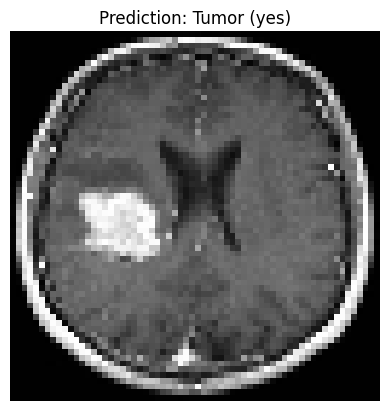

In [ ]:
import matplotlib.pyplot as plt

# Display the test image
plt.imshow(test_image, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()
